## problem 6.1  (a) 1-NN and 3-NN rules decision regions in-space and X-space regions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=np.array([[1,0,-1],  [0,1,-1],  [0,-1,-1],  [-1,0,-1],   [0,2,1],   [0,-2,1],   [-2,0,1]])
Y=data[:,-1]
X=data[:,0:2]
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf1.fit(X,Y)
clf2.fit(X,Y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 3
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

h=0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
Z = Z.reshape(xx.shape)

### 6.1 (a) decision regions for 1-NN rule for X-space

Text(0.5,1,'1-NN rule in X-space')

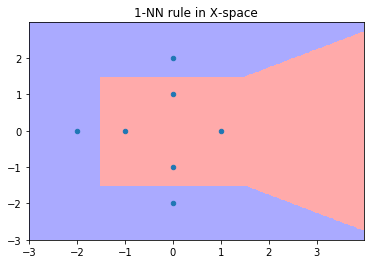

In [3]:
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.title('1-NN rule in X-space')

### decision region for 3-NN rule in X-space 

Text(0.5,1,'3-NN rule in X-space')

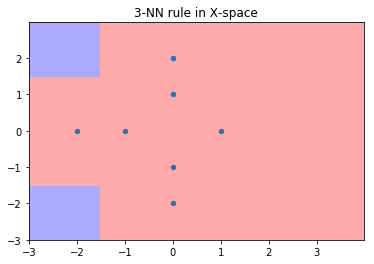

In [4]:
Z1 = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z1, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], s=20)
plt.title('3-NN rule in X-space')

## 6.1 (b) 

In [5]:
x1=X[:,0]
x2=X[:,1]
z1=[]
z2=[]
g=np.array([[0,-2],[0,-1.5],[0,1.5],[0,2],[-2,0],[-1,0],[1,0]])
z=np.array([[0,0.00],[0,0.00],[0,0.00],[0,0.00],[0,0.00],[0,0.00],[0,0.00]])
import math
for i in range(0,7):
    square=(x1[i]**2)+(x2[i]**2)
    if(x1[i]==0):
        arc=math.pi/2
    else:
        arc=np.arctan(x2[i]/x1[i])
    z1.append(math.sqrt(square))
    z2.append(arc)
for i in range(0,7):
    z[i][0]=z1[i]
    z[i][1]=z2[i]

In [6]:
clf1.fit(z,Y)
h=0.02
xx1,yy1= np.meshgrid(np.arange(-3, 3, h),np.arange(-3, 3, h))
Z2= clf1.predict(np.c_[xx1.ravel(),yy1.ravel()])

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
Z2=Z2.reshape(xx1.shape)

b1=[]
b2=[]
for i in range(0,7):
    if(i<4):
        b1.append(z[i])
    else:
        b2.append(z[i])
b1=np.asarray(b1)
b2=np.asarray(b2)


### (b)  z-space 1-NN in Z-space

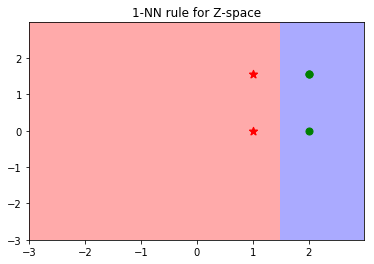

In [7]:
a=2.5
plt.figure(2)
plt.pcolormesh(xx1, yy1, Z2, cmap=cmap_light)
plt.title('1-NN rule for Z-space')
for i in range(0,4):
    plt.scatter(z[i][0],z[i][1],marker='*',c='r',s=70)
for i in range(0,3): 
    plt.scatter(b2[i][0],b2[i][1],marker='o',c='g',s=50)

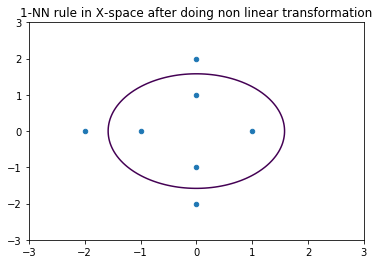

In [8]:
x = np.linspace(-3,3, 100)
y = np.linspace(-3,3, 100)
Xw, Yw = np.meshgrid(x,y)
F = Xw**2 + Yw**2 -a
plt.contour(Xw,Yw,F,[0])
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.title('1-NN rule in X-space after doing non linear transformation')
plt.show()

### (b) 3-NN rule in Z-space 

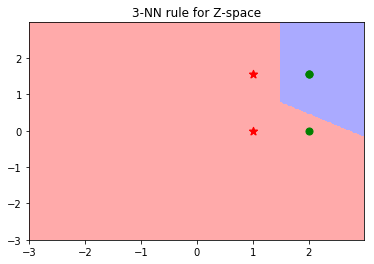

In [9]:
clf2.fit(z,Y)
xx2,yy2= np.meshgrid(np.arange(-3, 3, h),np.arange(-3, 3, h))
Z3= clf2.predict(np.c_[xx2.ravel(),yy2.ravel()])
Z3=Z3.reshape(xx2.shape)
plt.figure()
plt.pcolormesh(xx2, yy2, Z3, cmap=cmap_light)
plt.title('3-NN rule for Z-space')
for i in range(0,4):
    plt.scatter(z[i][0],z[i][1],marker='*',c='r',s=70)
for i in range(0,3): 
    plt.scatter(b2[i][0],b2[i][1],marker='o',c='g',s=50)